In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
monthly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/MonthlyMedians.csv")
yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/YearlyMedians.csv")
print(yearly)

         time  temperature  humidity  precipitation  pressure
0  2022-12-31         18.6      78.0            0.0     911.4
1  2023-12-31         20.7      78.0            0.0     913.4


<Axes: ylabel='Frequency'>

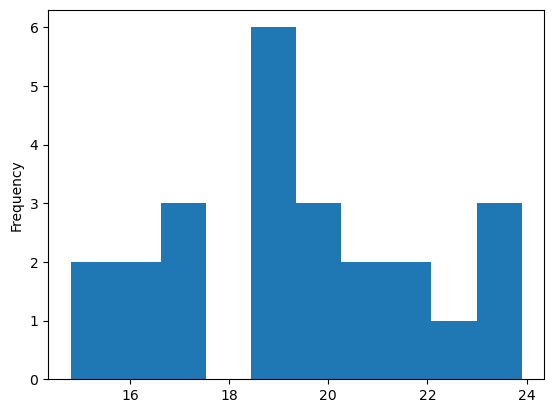

In [20]:
monthly["temperature"].plot.hist()

<Axes: ylabel='temperature'>

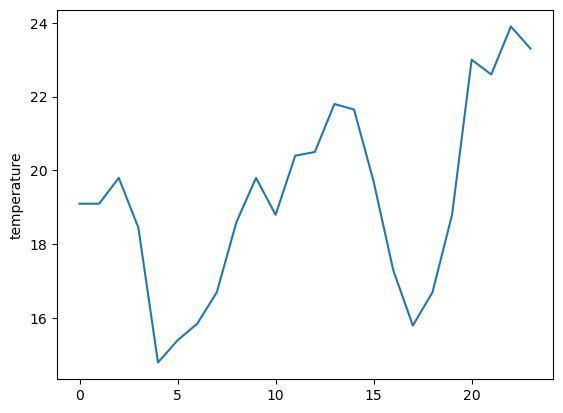

In [31]:
sns.lineplot(monthly["temperature"])

<Axes: ylabel='precipitation'>

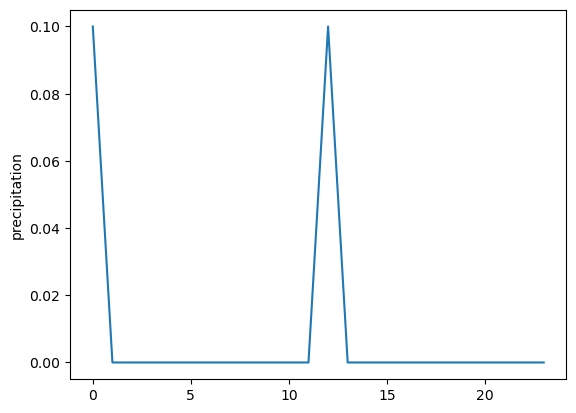

In [30]:
sns.lineplot(monthly["precipitation"])

<Axes: ylabel='humidity'>

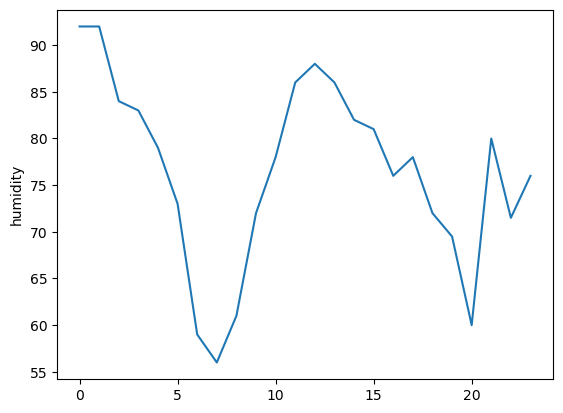

In [29]:
sns.lineplot(monthly["humidity"])

Correlation between rainfall and precipitation. Humidity raising indicates future rainfall. Humidity drops immediatly after rainfall occurs.

<Axes: ylabel='pressure'>

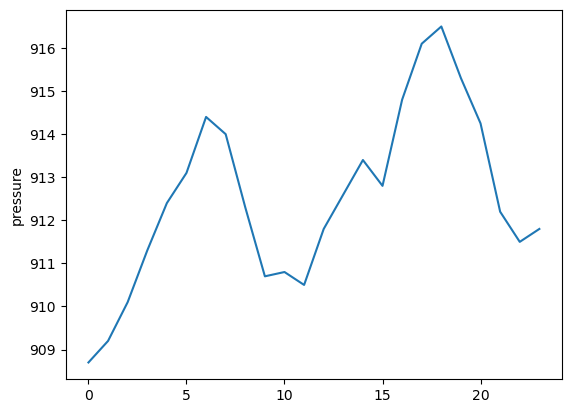

In [32]:
sns.lineplot(monthly["pressure"])

Pressure has a strong inverse correlation with Humidity